In [1]:
import pandas as pd
df = pd.read_csv('../assets/data/standardized.txt')
print(df.shape)
df.head()

(3729, 20)


,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,cmp%,ny/a,ypc,rush-split,td:touch,to:touch
0,Eli Manning,2013,23,42,256,1,1,2.0,18.0,2,-2,0,1,0.590578,-0.748473,-0.582619,-0.951009,-0.599933,-0.701024,0.260664
1,Peyton Manning,2013,32,51,400,4,0,1.0,3.0,0,0,0,0,1.150468,-0.000348,0.505696,-0.706494,-0.511240,0.930631,-1.058624
2,Cam Newton,2013,13,22,181,1,1,4.0,40.0,4,6,0,0,-0.902463,-0.342791,-0.575780,-0.339720,-0.084065,-0.358211,-0.047170
3,Carson Palmer,2013,13,25,178,1,4,2.0,10.0,5,-3,0,0,-0.715833,-1.007298,-0.184986,-0.853203,-0.701527,-0.419810,2.734329
4,Philip Rivers,2013,19,29,201,1,1,1.0,5.0,4,-3,0,1,-0.529203,0.259436,-0.032848,-0.889880,-0.673920,-0.474162,0.726295


In [2]:
# prepare to split into train/test matrices
from sklearn.model_selection import train_test_split

y_col = 'player'
labels = df[y_col].unique()
X_cols = ['touches', 'cmp%', 'ny/a', 'ypc', 'rush-split', 'td:touch', 'to:touch']

labels

array(['Eli Manning', 'Peyton Manning', 'Cam Newton', 'Carson Palmer',
       'Philip Rivers', 'Ben Roethlisberger', 'Tony Romo', 'Matt Schaub',
       'Alex Smith', 'Matthew Stafford', 'Michael Vick', 'Russell Wilson',
       'Joe Flacco', 'Tom Brady', 'Drew Brees', 'Matt Cassel',
       'Jay Cutler', 'Andy Dalton', 'Ryan Fitzpatrick', 'Matt Ryan',
       'Matt Hasselbeck', 'Aaron Rodgers', 'Brett Favre'], dtype=object)

## How We'll Do Logistic Regression

The idea is for one of the players of the game to assemble a handful of these logistic regression classifiers at a time. So even though sklearn's implementation can do one vs all out of the box, we'll be reinventing the wheel a bit

In [3]:
from sklearn.linear_model import LogisticRegression

def wrangle(df, p, sel):
    df = df.copy()
    df['player'] = (df['player'] == p).astype(int)
    train, test = train_test_split(df,
                                   test_size=0.2,
                                   stratify=df['player'],
                                   random_state=143)
    return train[sel], test[sel]

models = {}
for p in labels:
    X_train, X_test = wrangle(df, p, X_cols)
    y_train, y_test = wrangle(df, p, y_col)
    model = LogisticRegression(
        class_weight='balanced',
        n_jobs=-1,
        random_state=143
    )
    model.fit(X_train, y_train)
    models[p] = [model, model.score(X_test, y_test)]

for k in models:
    print(k, models[k][1])

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver w

Eli Manning 0.5723860589812333
Peyton Manning 0.6353887399463807
Cam Newton 0.868632707774799
Carson Palmer 0.5227882037533512
Philip Rivers 0.5281501340482574
Ben Roethlisberger 0.5214477211796247
Tony Romo 0.5522788203753352
Matt Schaub 0.6394101876675603
Alex Smith 0.6809651474530831
Matthew Stafford 0.5804289544235925
Michael Vick 0.839142091152815
Russell Wilson 0.7680965147453083
Joe Flacco 0.5831099195710456
Tom Brady 0.5589812332439679
Drew Brees 0.6729222520107239
Matt Cassel 0.7211796246648794
Jay Cutler 0.6689008042895442
Andy Dalton 0.6126005361930295
Ryan Fitzpatrick 0.7184986595174263
Matt Ryan 0.5697050938337802
Matt Hasselbeck 0.6072386058981233
Aaron Rodgers 0.6742627345844504
Brett Favre 0.5254691689008043


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


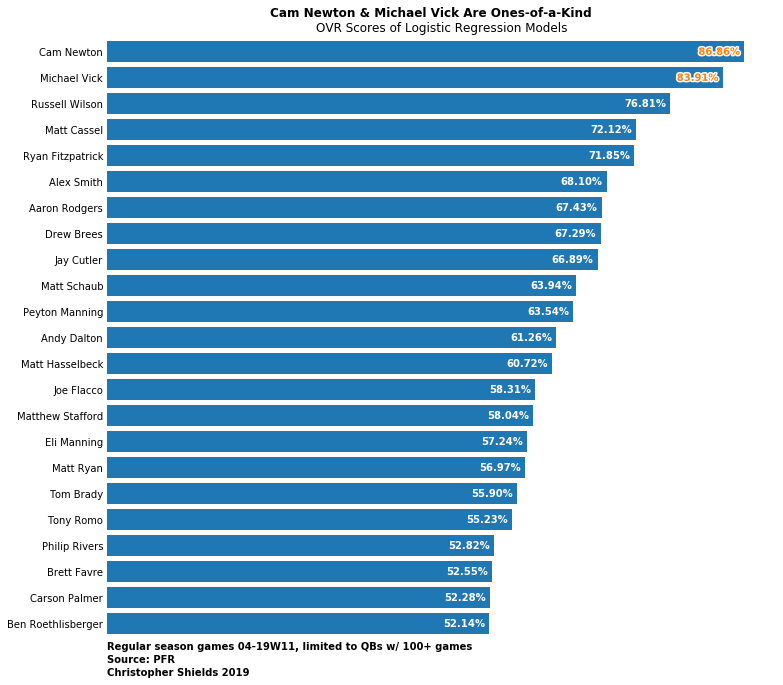

In [7]:
# visualize skill of each logistic regressor
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

smods = [(p, models[p][1]) for p in models]
smods.sort(key=lambda x: x[1])
x = [_[0] for _ in smods]
y = [_[1] for _ in smods]

plt.figure(figsize=(12,12))
plt.suptitle('Cam Newton & Michael Vick Are Ones-of-a-Kind',
             fontweight='bold',
             y=0.885)
plt.title('OVR Scores of Logistic Regression Models',
          y=0.96)
plt.barh(x, y)

for i in range(len(y)):
    xx = y[i] - 0.0625
    yy = i - 0.125
    lbl = f'{y[i]*100:.2f}%'
    if i > (len(y) - 3):
        txt = plt.text(xx, yy, lbl, fontweight='bold', color='C1')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=3, foreground='white')
        ])
    else:
        plt.text(xx, yy, lbl, fontweight='bold', color='white')

ax = plt.axes()
ax.tick_params(axis='both', length=0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])

plt.text(0, -1, 'Regular season games 04-19W11, limited to QBs w/ 100+ games',
         fontweight='bold')
plt.text(0, -1.5, 'Source: PFR', fontweight='bold')
plt.text(0, -2, 'Christopher Shields 2019', fontweight='bold')

plt.savefig('../assets/ovr-lrs.png')
plt.show()

In [28]:
# save each logistic regressor
import pickle
for p in models:
    fn = p.replace(' ', '')
    pickle.dump(models[p][0], open(f'../assets/models/lrs/{fn}.pkl', 'wb'))

In [29]:
def ovr_lr(rows, models):
    probs = [models[qb][0].predict_proba(rows)[0][0] for qb in models]
    lbld = list(zip(models.keys(), probs))
    sums = sum([x[1] for x in lbld])
    divd = {x[0]:x[1]/sums for x in lbld}
    return divd

def get_scores(X, models):
    scores = X.apply(lambda x: ovr_lr([x], models), axis=1)
    mapped = [list(x.values()) for x in scores]
    return mapped

df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     stratify=df[y_col],
                                     random_state=143)

X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = df_train[y_col]
y_test = df_test[y_col]

y_scores = get_scores(X_test, models)
y_scores

[[0.04841039401627294,
  0.03908907874717808,
  0.06817046160986859,
  0.04415738896760016,
  0.03877765627669358,
  0.028970701022294355,
  0.037109801821230914,
  0.054089280393675956,
  0.04869875401490926,
  0.0388896012923056,
  0.06268467565538312,
  0.03844989468780267,
  0.05064776443281511,
  0.0369815269636386,
  0.034468892006826485,
  0.0551909766837006,
  0.039406466805724454,
  0.039159584128473555,
  0.04481394860759368,
  0.030465787125272425,
  0.047171879764523014,
  0.03371014548193535,
  0.0404853394942816],
 [0.05360638024427307,
  0.03232041211892942,
  0.05338131363714667,
  0.04432921917386618,
  0.03210383322479243,
  0.031460667201024244,
  0.03553279582399114,
  0.0458918176395947,
  0.05007569025712189,
  0.048305198266582444,
  0.05719214991541664,
  0.03236030645893991,
  0.050536069910810597,
  0.040031911077918834,
  0.034936227694399954,
  0.05715218035792446,
  0.044480858868681,
  0.04146184137225219,
  0.04672424716734556,
  0.0370262842636669,
  0.0

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
pd.set_option('display.max_rows', None)
y_test_bin = label_binarize(y_test, classes=labels)
roc_auc_score(y_test_bin, y_scores)

0.3106044850971606

## In Conclusion

This garden of binary logistic regression classifiers is definitely distinguishing classes, but it keeps getting the answers wrong (which isn't that surprising; it's a hard problem!)